## Segmentación de Actividad Humana: Detección de Puntos de Cambio en Señales de ts_id=0 usando BottomUp

## Importar Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt

### Cargar el Conjunto de Datos

In [3]:
file_path = r"C:\Users\chair\OneDrive\Bureau\data2\has2023_master.csv"
df_flat = pd.read_csv(file_path)

### Definir las Columnas de Señales

In [6]:
signal_columns = df_flat.columns[8:]

### Seleccionar la Serie Temporal con ts_id=0

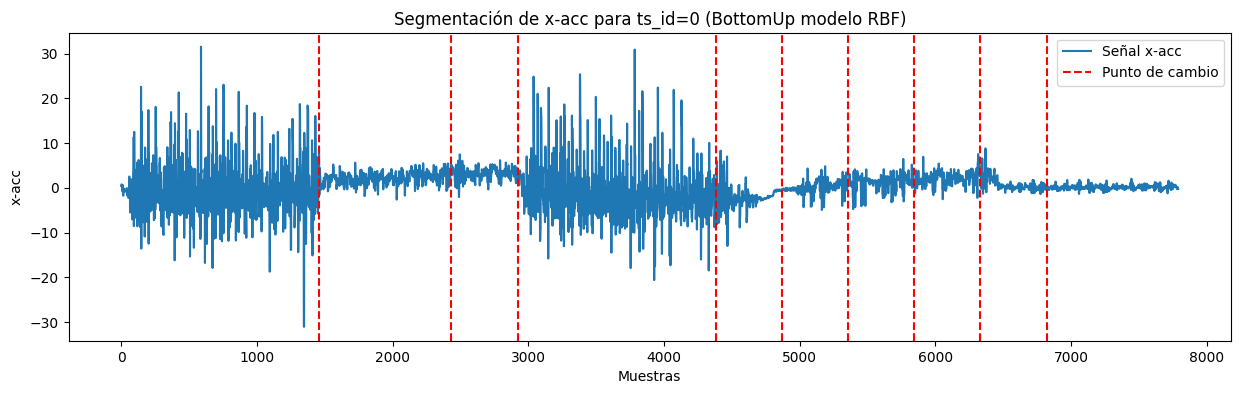

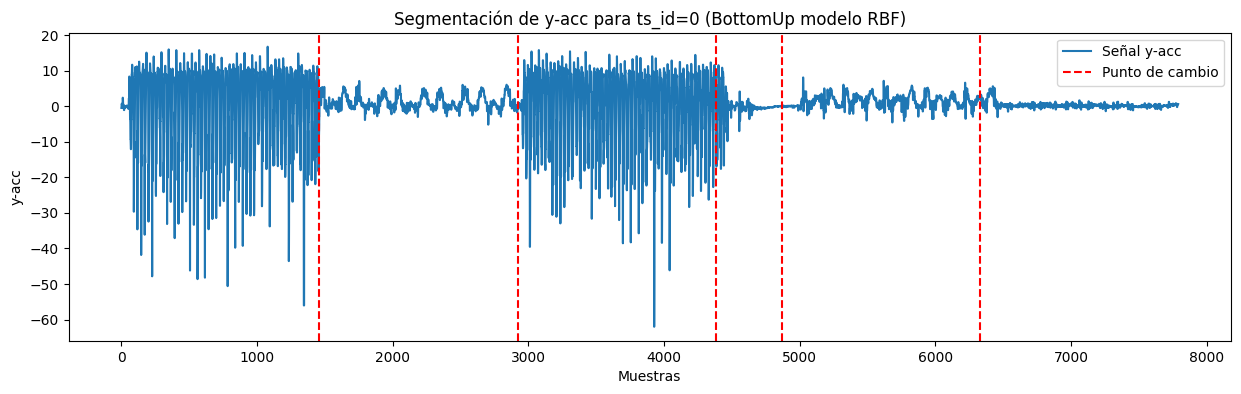

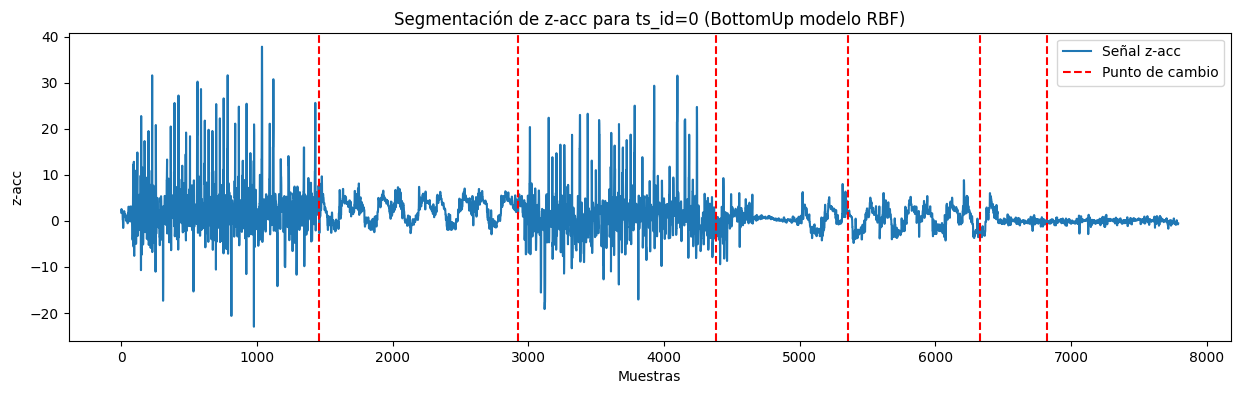

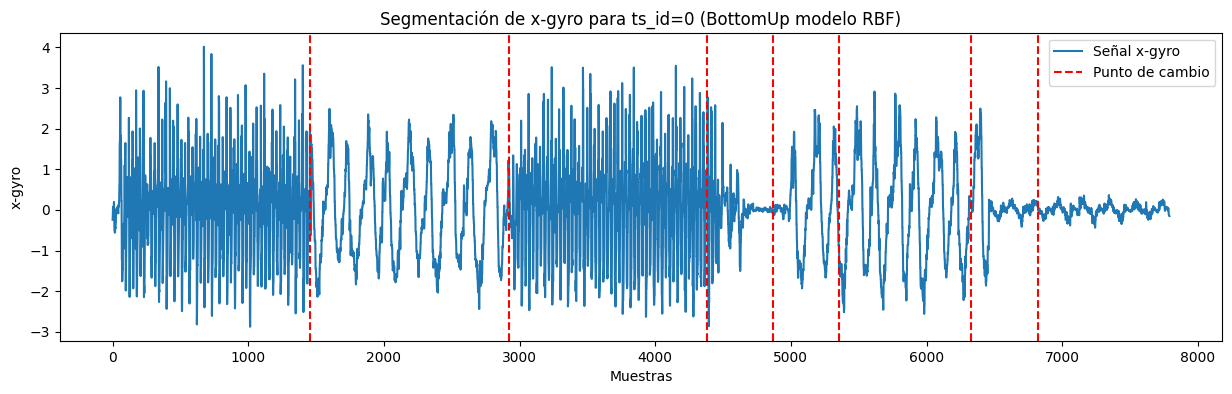

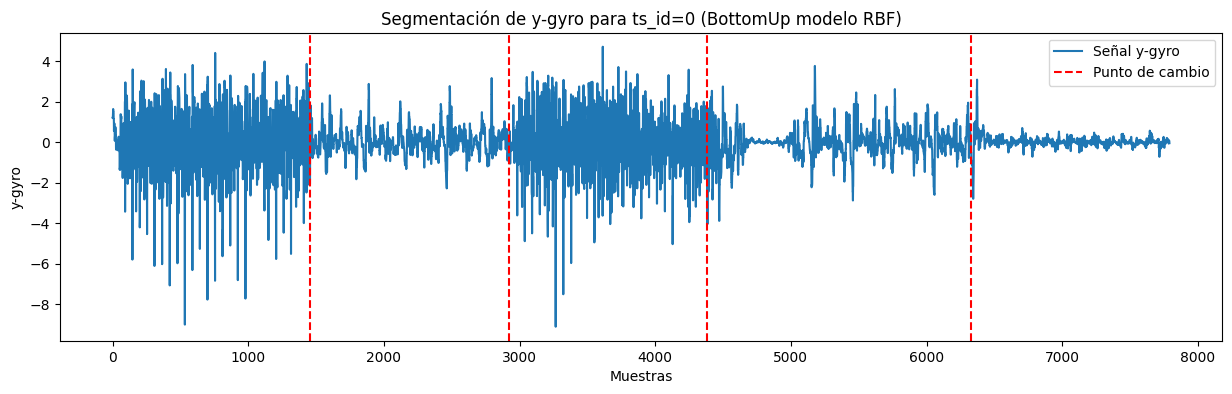

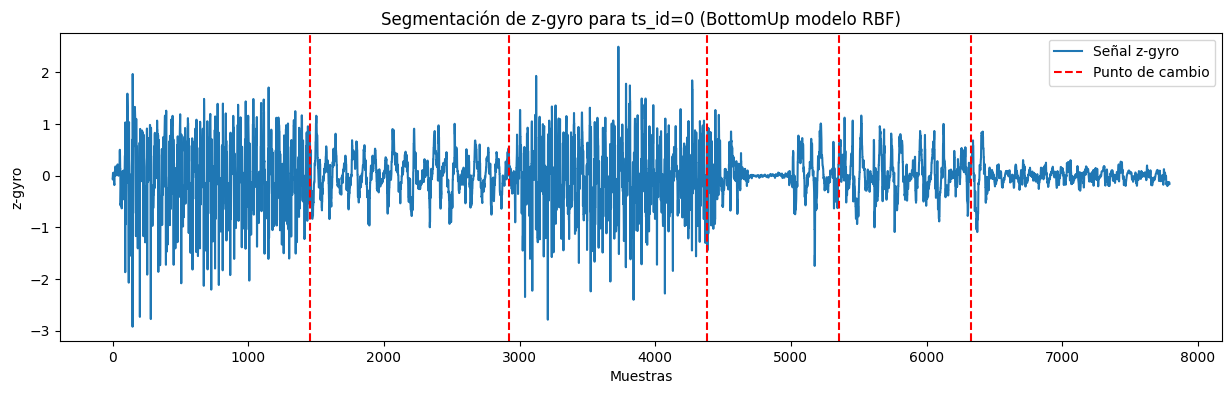

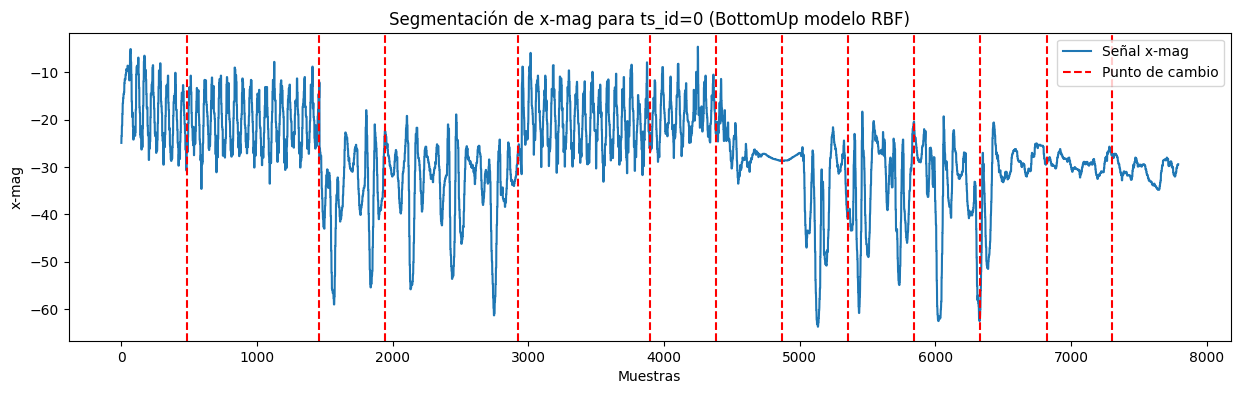

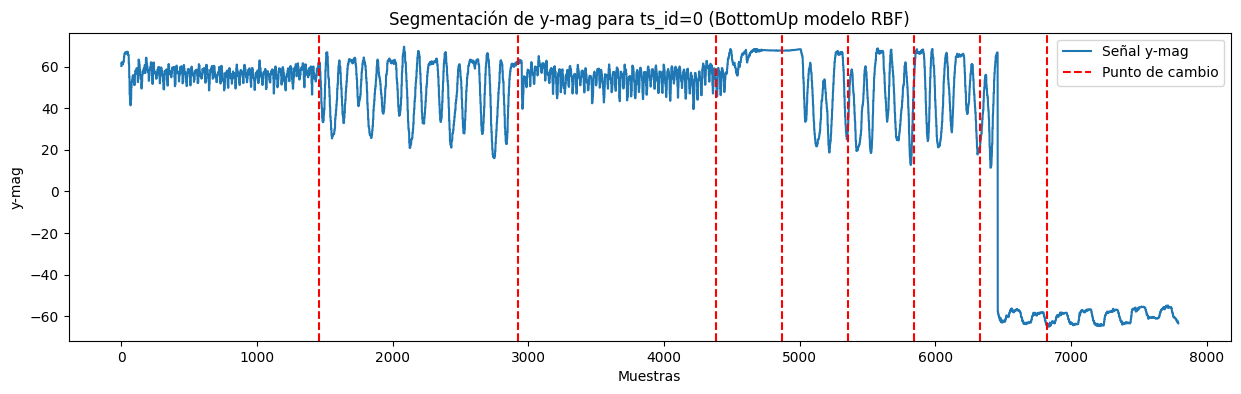

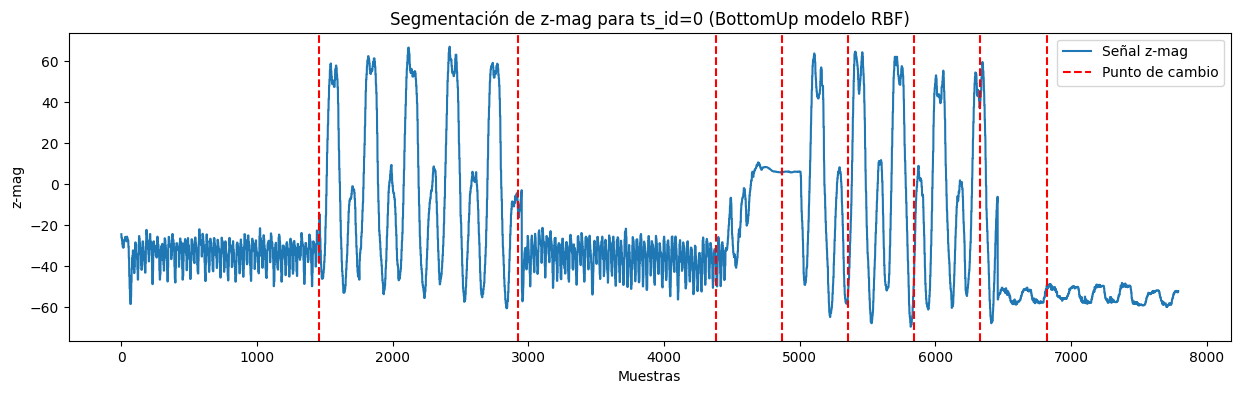

In [8]:
# Tomar el registro con ts_id=0
ejemplo_ts = df_flat[df_flat['ts_id'] == 0].iloc[0]

# Iterar sobre cada columna de señal
for columna in signal_columns:
    senal = ejemplo_ts[columna]

    # Verificar si es una cadena de texto y limpiar los corchetes
    if isinstance(senal, str):
        senal = senal.strip("[]")
        if senal == "":
            continue  # Ignorar señales vacías

        # Convertir la cadena en una lista de valores float
        valores = [float(x) for x in senal.split(",") if x.strip() != ""]

        # Continuar solo si hay suficientes datos
        if len(valores) < 10:
            continue

        # Detección de puntos de cambio con BottomUp (modelo 'rbf')
        algo = rpt.BottomUp(model="rbf", min_size=int(len(valores) * 0.05)).fit(np.array(valores))

        # Predecir rupturas con penalización
        puntos_cambio = np.array(algo.predict(pen=10)[:-1], dtype=np.int64)

        # Visualización del gráfico
        plt.figure(figsize=(15, 4))
        plt.plot(valores, label=f"Señal {columna}")
        for pc in puntos_cambio:
            plt.axvline(pc, color='red', linestyle='--', label='Punto de cambio' if pc == puntos_cambio[0] else "")

        plt.title(f"Segmentación de {columna} para ts_id=0 (BottomUp modelo RBF)")
        plt.xlabel("Muestras")
        plt.ylabel(columna)
        plt.legend()
        plt.grid(False)
        plt.show()


### Seleccionar la Serie Temporal con ts_id=107

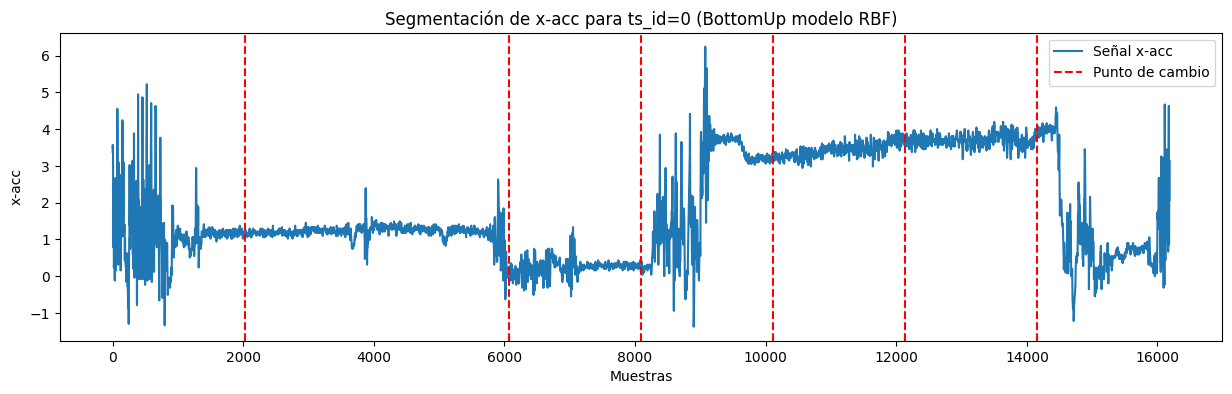

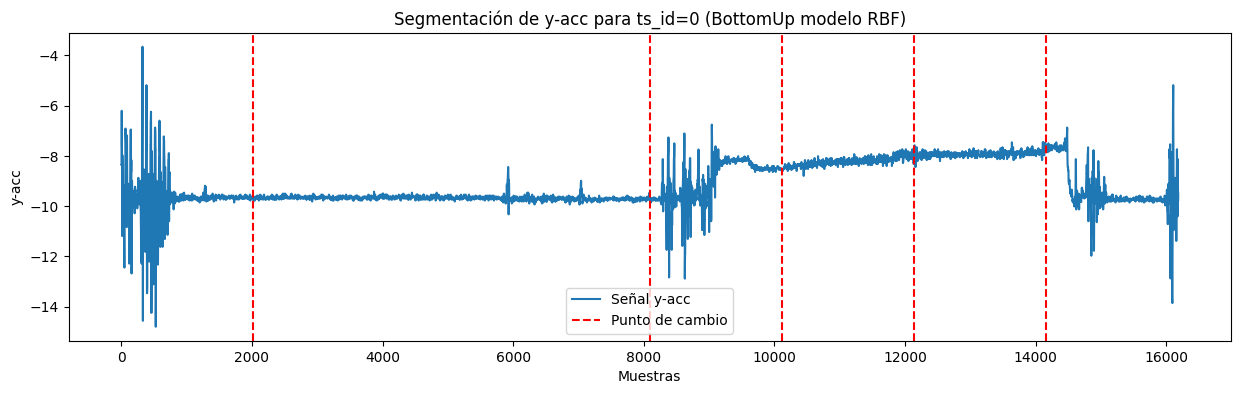

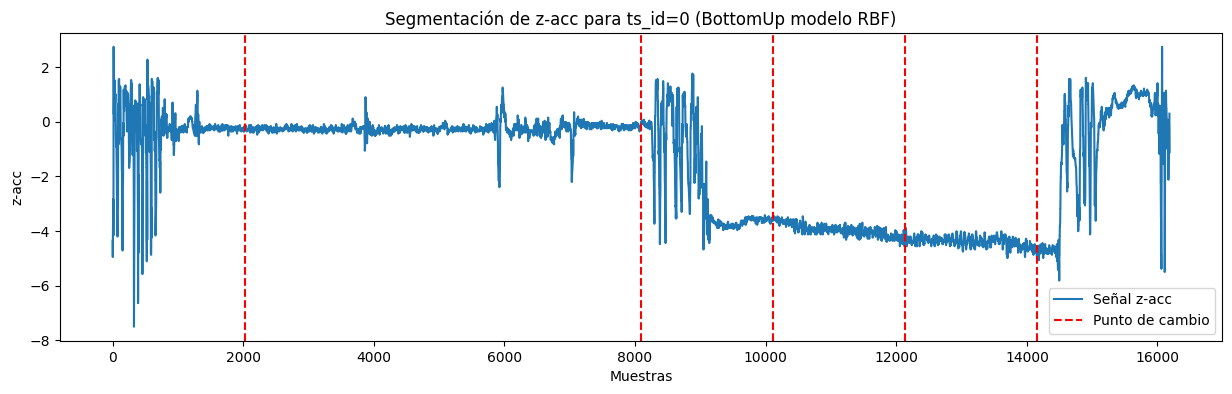

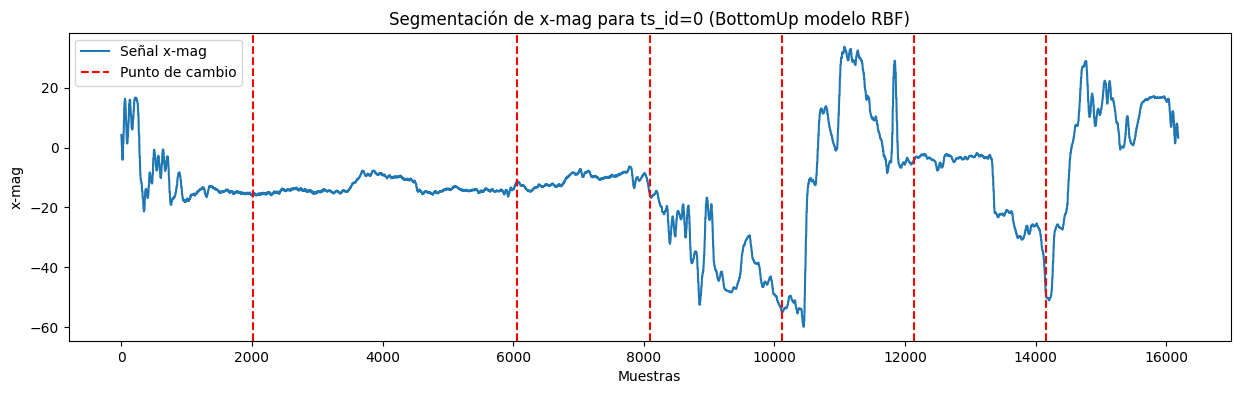

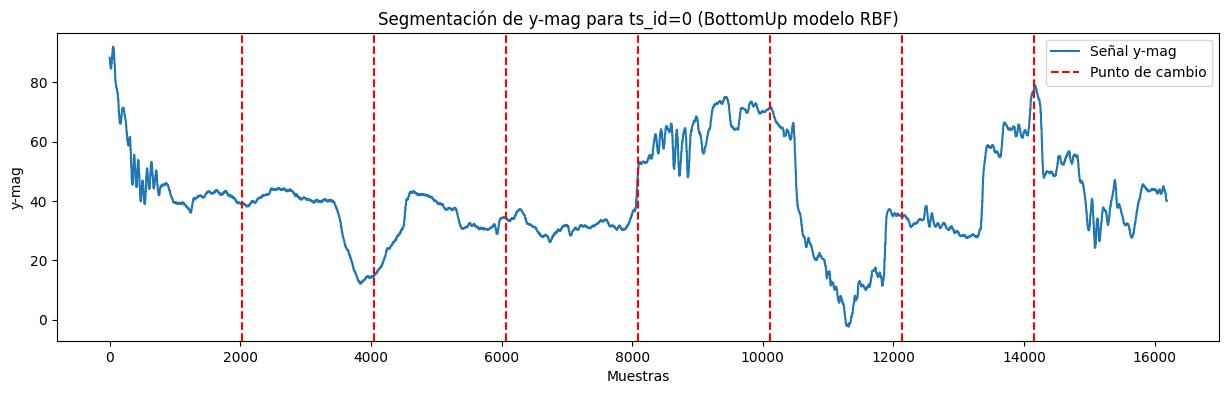

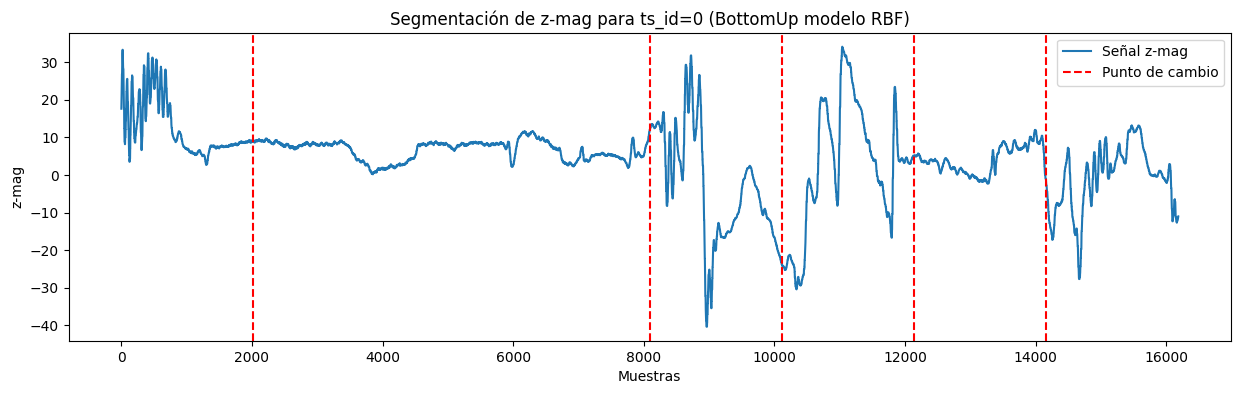

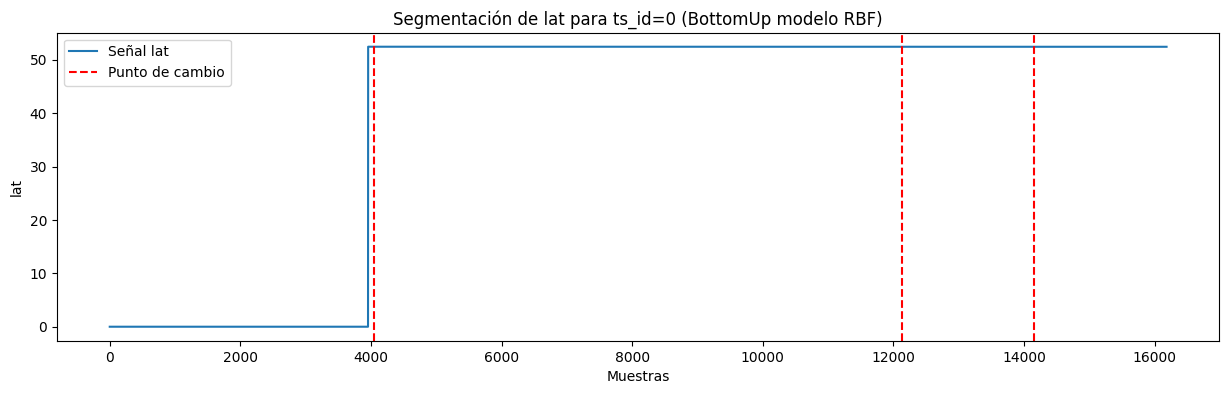

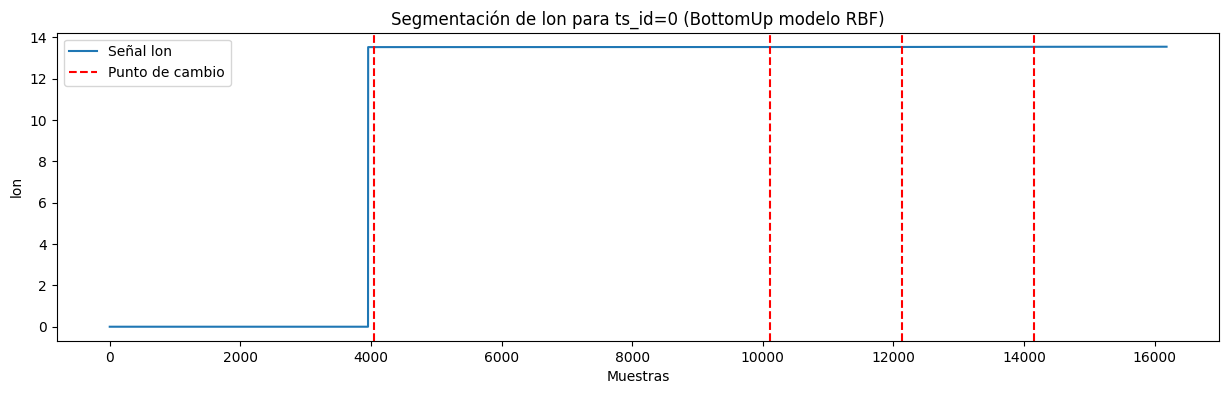

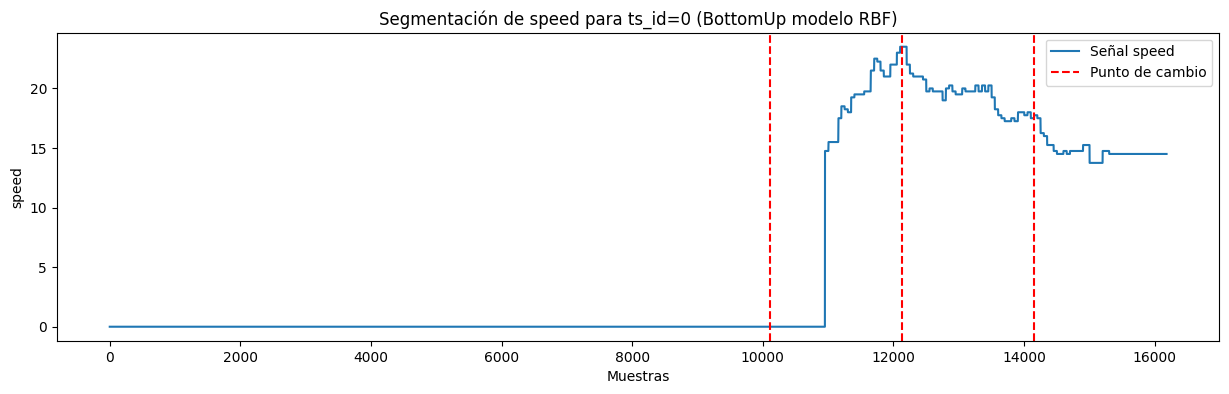

In [13]:
# Tomar el registro con ts_id=107
ejemplo_ts = df_flat[df_flat['ts_id'] == 107].iloc[0]

# Iterar sobre cada columna de señal
for columna in signal_columns:
    senal = ejemplo_ts[columna]

    # Verificar si es una cadena de texto y limpiar los corchetes
    if isinstance(senal, str):
        senal = senal.strip("[]")
        if senal == "":
            continue  # Ignorar señales vacías

        # Convertir la cadena en una lista de valores float
        valores = [float(x) for x in senal.split(",") if x.strip() != ""]

        # Continuar solo si hay suficientes datos
        if len(valores) < 10:
            continue

        # Detección de puntos de cambio con BottomUp (modelo 'rbf')
        algoritmo = rpt.BottomUp(model="rbf", min_size=int(len(valores) * 0.1)).fit(np.array(valores))

        # Predecir rupturas con penalización
        puntos_cambio = np.array(algoritmo.predict(pen=30)[:-1], dtype=np.int64)

        # Visualización del gráfico
        plt.figure(figsize=(15, 4))
        plt.plot(valores, label=f"Señal {columna}")
        for pc in puntos_cambio:
            plt.axvline(pc, color='red', linestyle='--', label='Punto de cambio' if pc == puntos_cambio[0] else "")

        plt.title(f"Segmentación de {columna} para ts_id=107 (BottomUp modelo RBF)")
        plt.xlabel("Muestras")
        plt.ylabel(columna)
        plt.legend()
        plt.grid(False)
        plt.show()
